In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#docker相关
#https://tianchi.aliyun.com/forum/postDetail?postId=165595

#docker提交
'''
## docker登陆（push镜像需要登陆,服务器地址为赛事要求的，这里以上海为例）：
docker login --username=你自己的用户名 registry.cn-shanghai.aliyuncs.com

## 不要忘记加.
## 公网地址上述已经提到过
docker build -t 公网地址/版本号 .

## 构建完成后可先验证是否正常运行，正常运行后再进行推送。
CPU镜像：docker run 公网地址/版本号 sh run.sh
GPU镜像：nvidia-docker run 公网地址/版本号 sh run.sh

## 推送到镜像仓库,如果出错，可能没登录
docker push 公网地址/版本号 
'''
#dockerfile
'''
# Base Images
## 从天池基础镜像构建
FROM registry.cn-shanghai.aliyuncs.com/tcc-public/python:3

## 把当前文件夹里的文件构建到镜像的根目录下（.后面有空格，不能直接跟/）
ADD . /

## 指定默认工作目录为根目录（需要把run.sh和生成的结果文件都放在该文件夹下，提交后才能运行）
WORKDIR /

## Install Requirements（requirements.txt包含python包的版本）
## 这里使用清华镜像加速安装
RUN pip install -i https://pypi.tuna.tsinghua.edu.cn/simple -r requirements.txt

## 镜像启动后统一执行 sh run.sh
CMD ["sh", "run.sh"]
'''
#run.sh
'''
#!/bin/sh
CURDIR="`dirname $0`" #获取此脚本所在目录
echo $CURDIR
cd $CURDIR #切换到该脚本所在目录
python hello_world.py
'''

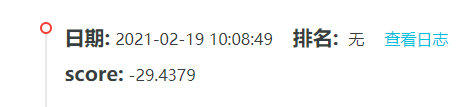